In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

class k_armed_bandit:
    def __init__(self,k,steps,runs,epsilon,alpha,mode,c,is_stat):
        self.k=k
        self.mode = mode
        self.nos=steps
        self.runs=runs
        if is_stat == True:
            self.q_star=np.random.randn(self.k)
        else:
            self.q_star=np.zeros(self.k)
        self.q_estimate=c*np.ones(self.k)
        self.epsilon=epsilon
        self.alpha=alpha
        self.action_count = np.zeros(self.k)
        self.current_action = 0
        self.current_reward = 0
        self.factor=c
        self.is_stat = is_stat

    def choose_action(self):
        random_v = np.random.uniform(0,1)
        if random_v < self.epsilon:
            action = int(np.random.uniform(0,1)*10)
        else:
            action = np.argmax(self.q_estimate)
        #print("Action chosen: " + str(action))
        self.current_action = action
        return action

    def choose_action_ucb(self,step):
        max_ = -1
        action = -1
        for i in range(self.k):
            if self.action_count[i] == 0:
                max_value = sys.maxsize
            else:
                max_value = self.q_estimate[i]+2*(np.sqrt(np.log(step+1)/self.action_count[i]))
            if max_value > max_:
                max_ = max_value
                action = i
        self.current_action = action
        return action

    def get_reward(self):
        self.current_reward = np.random.normal(self.q_star[self.current_action],1)
        self.action_count[self.current_action] = self.action_count[self.current_action]+1
        self.q_estimate[self.current_action] = self.update_estimate(self.action_count[self.current_action])
        return self.current_reward

    def update_estimate(self,n):
        if self.mode == "constant_alpha":
            ans = self.q_estimate[self.current_action]+(self.alpha*(self.current_reward-self.q_estimate[self.current_action]))
        else:
            ans = self.q_estimate[self.current_action]+((1.0/n)*(self.current_reward-self.q_estimate[self.current_action]))
        return ans

    def reset(self):
        if self.is_stat == True:
            self.q_star = np.random.randn(self.k)
        else:
            self.q_star = np.zeros(self.k)
        self.q_estimate = self.factor*np.ones(self.k)
        self.action_count = np.zeros(self.k)
        self.current_action = 0
        self.current_reward = 0

    def solve(self,is_ucb):
        optimal_actions_table = np.zeros((self.runs,self.nos))
        rewards_table = np.zeros((self.runs,self.nos))
        for i in range(self.runs):
            self.reset()
            #print(i)
            for j in range(self.nos):
                if is_ucb == 1:
                    action = self.choose_action_ucb(j)
                else:
                    action = self.choose_action()
                if action == np.argmax(self.q_star):
                    optimal_actions_table[i,j] = 1
                rewards_table[i,j] = self.get_reward()
                if self.is_stat == False:
                    for s in range(self.k):
                        self.q_star[s] = self.q_star[s] + np.random.normal(0,0.01)
        return rewards_table.mean(axis=0),optimal_actions_table.mean(axis=0)

def run(epsilon,mode,c,is_stationary,nos,is_ucb):
    no_of_runs = 2000
    no_of_steps = nos
    no_of_arms = 10
    bandit = k_armed_bandit(no_of_arms, no_of_steps, no_of_runs,epsilon, 0.1,mode,c,is_stationary)
    rewards, optimal_action = bandit.solve(is_ucb)
    return rewards,optimal_action

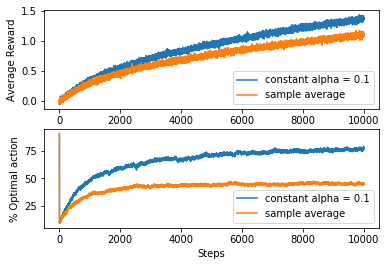

In [17]:
# Question 1

r1,o1 = run(0.1,'constant_alpha',0,False,10000,0)
r2,o2 = run(0.1,'sample_average',0,False,10000,0)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(r1,label='constant alpha = 0.1')
plt.plot(r2,label='sample average')
plt.legend()
plt.ylabel('Average Reward')
plt.xlabel('Steps')
plt.subplot(2, 1, 2)
plt.plot(o1*100,label='constant alpha = 0.1')
plt.plot(o2*100,label='sample average')
plt.legend()
plt.ylabel('% Optimal action')
plt.xlabel('Steps')
file_name = 'q1_final'+ '.png'
plt.savefig(file_name)
plt.show()
plt.close()

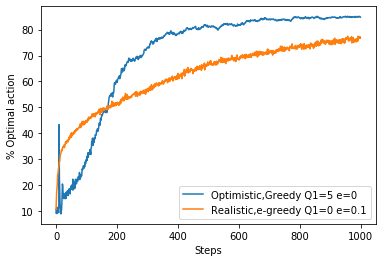

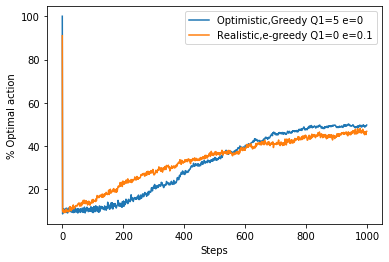

In [18]:
# Question 2

r1,o1 = run(0,'constant_alpha',5,True,1000,0)
r2,o2 = run(0.1,'constant_alpha',0,True,1000,0)

plt.figure()
plt.plot(o1*100,label='Optimistic,Greedy Q1=5 e=0')
plt.plot(o2*100,label='Realistic,e-greedy Q1=0 e=0.1')
plt.ylabel('% Optimal action')
plt.xlabel('Steps')
plt.legend()
plt.savefig('q2_stat_final_1000.png')
plt.show()
plt.close()

r1,o1 = run(0,'constant_alpha',5,False,1000,0)
r2,o2 = run(0.1,'constant_alpha',0,False,1000,0)

plt.figure()
plt.plot(o1*100,label='Optimistic,Greedy Q1=5 e=0')
plt.plot(o2*100,label='Realistic,e-greedy Q1=0 e=0.1')
plt.ylabel('% Optimal action')
plt.xlabel('Steps')
plt.legend()
plt.savefig('q2_nonstat_final_1000.png')
plt.show()
plt.close()

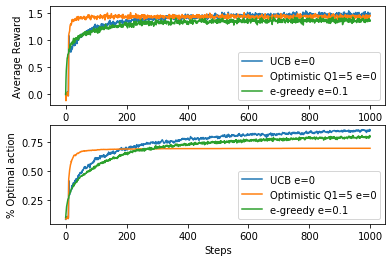

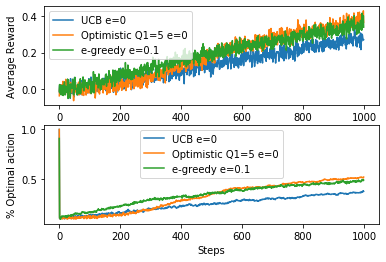

In [2]:
# Question 4

r1,o1 = run(0,'sample_average',0,True,1000,1)
r2,o2 = run(0,'sample_average',5,True,1000,0)
r3,o3 = run(0.1,'sample_average',0,True,1000,0)

plt.figure()
plt.subplot(2,1,1)
plt.plot(r1,label='UCB e=0')
plt.plot(r2,label='Optimistic Q1=5 e=0')
plt.plot(r3,label='e-greedy e=0.1')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.subplot(2,1,2)
plt.plot(o1,label='UCB e=0')
plt.plot(o2,label='Optimistic Q1=5 e=0')
plt.plot(o3,label='e-greedy e=0.1')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()
plt.savefig('q3_final_3_stat.png')
plt.show()
plt.close()

r1,o1 = run(0,'constant_alpha',0,False,1000,1)
r2,o2 = run(0,'constant_alpha',5,False,1000,0)
r3,o3 = run(0.1,'constant_alpha',0,False,1000,0)

plt.figure()
plt.subplot(2,1,1)
plt.plot(r1,label='UCB e=0')
plt.plot(r2,label='Optimistic Q1=5 e=0')
plt.plot(r3,label='e-greedy e=0.1')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.subplot(2,1,2)
plt.plot(o1,label='UCB e=0')
plt.plot(o2,label='Optimistic Q1=5 e=0')
plt.plot(o3,label='e-greedy e=0.1')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()
plt.savefig('q3_final_3_nonstat.png')
plt.show()
plt.close()